# Setting up

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!cp -r drive/MyDrive/newz-aware/ /content/newz-aware

In [4]:
%cd newz-aware/

/content/newz-aware


In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.9 MB 5.0 MB/s 
     |████████████████████████████████| 97 kB 3.4 MB/s 
     |████████████████████████████████| 9.9 MB 24.9 MB/s 
     |████████████████████████████████| 149 kB 47.8 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 33.2 MB/s 
     |████████████████████████████████| 61 kB 7.8 MB/s 
     |████████████████████████████████| 133 kB 52.3 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 11.2 MB 32.2 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.22.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Preprocessing Data

In [38]:
df = pd.read_csv('TrainingData/scrapedDataset.csv')

X = df['title']
y = df['bias']

In [39]:
import spacy
from nltk.corpus import stopwords
import re

class PreProcessor:

    def __init__(self, lang = 'english'):
        self.nlp = spacy.load('en_core_web_sm')
        self.stop_words = set(stopwords.words(lang))

    def remove_special_chars(self, doc):

        doc = " ".join(re.findall(r'[a-zA-Z0-9]+', doc))
        return doc.lower()

    def lemmatize(self, doc):
        doc = self.nlp(doc)
        tokenized = [token.lemma_ for token in doc]
        return tokenized

    def remove_stop_words(self, tokenized_doc):

        tokenized_doc_no_stopwords = []

        for word in tokenized_doc:
            if word not in self.stop_words:
                tokenized_doc_no_stopwords.append(word)

        return tokenized_doc_no_stopwords

    def forward(self, doc):
        doc = self.remove_special_chars(doc)
        doc = self.lemmatize(doc)
        doc = self.remove_stop_words(doc)

        return " ".join(doc)

preproc = PreProcessor()

for i,x in enumerate(X):
    X[i] = preproc.forward(str(X[i]))
    print("Processing sample #{}".format(i+1))

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
Processing sample #16005
Processing sample #16006
Processing sample #16007
Processing sample #16008
Processing sample #16009
Processing sample #16010
Processing sample #16011
Processing sample #16012
Processing sample #16013
Processing sample #16014
Processing sample #16015
Processing sample #16016
Processing sample #16017
Processing sample #16018
Processing sample #16019
Processing sample #16020
Processing sample #16021
Processing sample #16022
Processing sample #16023
Processing sample #16024
Processing sample #16025
Processing sample #16026
Processing sample #16027
Processing sample #16028
Processing sample #16029
Processing sample #16030
Processing sample #16031
Processing sample #16032
Processing sample #16033
Processing sample #16034
Processing sample #16035
Processing sample #16036
Processing sample #16037
Processing sample #16038
Processing sample #16039
Processing sample #16040
Processing sample #16041
Processing sample #16042

0       zimmerman verdict renew focus stand ground law
1    senate immigration bill pass judiciary committ...
2    let doma fool supreme court restrict right was...
3    obamacare trouble exchange provision delay law...
4    exclusive immigration agent rip house lawmaker...
Name: title, dtype: object

In [40]:
y.replace(to_replace = list(range(-4,5)), value=[0,0,0,1,1,1,2,2,2], inplace=True)
y.value_counts()

1    17510
2     1878
0     1616
Name: bias, dtype: int64

In [41]:
df = pd.concat([X,y], axis=1)
df

,title,bias
0,zimmerman verdict renew focus stand ground law,1
1,senate immigration bill pass judiciary committ...,1
2,let doma fool supreme court restrict right was...,1
3,obamacare trouble exchange provision delay law...,1
4,exclusive immigration agent rip house lawmaker...,1
...,...,...
20999,dana milbank senator turn table cayman investo...,2
21000,republicans hatred obama blind public disinter...,2
21001,dana milbank stockman step forward republican ...,1
21002,e j dionne republican problem solver washingto...,2


In [42]:
df.drop(df[df['title']=='nan'].index, inplace=True)

In [43]:
y.value_counts()

1    17510
2     1878
0     1616
Name: bias, dtype: int64

In [44]:
df_class0 = df[df['bias'] == 0]
df_class1 = df[df['bias'] == 1]
df_class2 = df[df['bias'] == 2]

In [45]:
df_class0_oversampled = df_class0.sample(df_class1.shape[0], replace = True)
df_class2_oversampled = df_class2.sample(df_class1.shape[0], replace = True)

print(df_class0_oversampled.shape)
print(df_class2_oversampled.shape)

(12098, 2)
(12098, 2)


In [46]:
df_oversampled = pd.concat([df_class1, df_class0_oversampled, df_class2_oversampled], axis = 0)
print(df_oversampled.shape)
print(df_oversampled['bias'].value_counts())

(36294, 2)
1    12098
0    12098
2    12098
Name: bias, dtype: int64


In [47]:
df = df_oversampled

In [48]:
X = df['title']
y = df['bias']

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [50]:
vocab_size = 10000

one_hot_repr = [one_hot(title, vocab_size) for title in X]
one_hot_repr

[[1994, 2034, 1316, 3187, 9254, 782, 6988],
 [3344, 4850, 965, 8407, 5336, 427, 6539, 4267, 4946],
 [7701, 2196, 564, 7896, 6366, 9064, 6455, 8253, 9216],
 [8384, 7906, 3446, 9894, 7150, 5868, 8166, 7107, 7839, 9855, 4946],
 [4729, 4850, 9829, 542, 6921, 5868, 8166, 787],
 [7857, 244, 7701, 5852, 7475, 4150, 2366, 264, 590],
 [8025, 965, 8756, 3017, 8407, 3398, 6921, 9925, 4946],
 [3678, 7701, 7597, 232, 1362, 1030, 1535, 9761, 7192, 4114, 3303],
 [5604,
  1537,
  7770,
  4433,
  2381,
  6280,
  2329,
  1929,
  9925,
  4946,
  2666,
  2062,
  7355],
 [5109, 5408, 6887, 7330, 6344, 5558],
 [3344, 2154, 8363, 8313, 6366, 4088, 5897, 8676, 6309],
 [9451, 8017, 812, 7257, 460, 4554, 2791, 5205, 8253, 9216],
 [810, 8109, 5908, 4962, 1109, 5493, 413, 9776, 1196, 8084, 6539, 4267, 4946],
 [9201, 9258, 6815, 8746, 4971, 4383, 6817, 6455, 335, 6539, 4267, 4946],
 [1537, 4435, 5549, 2774, 7375, 441, 6515, 5010, 5897, 8676, 6309],
 [2943, 3755, 7199, 6193, 2648, 3709, 8879, 4111, 9493, 4452, 9855

In [51]:
max([len(x) for x in one_hot_repr])

19

In [52]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_repr, padding='pre', maxlen = sent_length)
embedded_docs

array([[   0,    0,    0, ..., 9254,  782, 6988],
       [   0,    0,    0, ..., 6539, 4267, 4946],
       [   0,    0,    0, ..., 6455, 8253, 9216],
       ...,
       [   0,    0,    0, ..., 5897, 8676, 6309],
       [   0,    0,    0, ..., 7475, 8884, 4090],
       [   0,    0,    0, ..., 9362, 7499, 2853]], dtype=int32)

In [53]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)

In [54]:
from sklearn.model_selection import train_test_split

train_X, t_X, train_y, t_y = train_test_split(embedded_docs, y, test_size=0.2, stratify=y, random_state=101)
test_X, dev_X, test_y, dev_y = train_test_split(t_X, t_y, test_size=0.5, stratify=t_y, random_state=101)

In [55]:
train_X.shape

(29035, 20)

# Training

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

embedding_vector_features = 40
model = Sequential([
                Embedding(vocab_size, embedding_vector_features, input_length=sent_length),
                LSTM(100),
                Dense(16, activation='relu'),
                Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 40)            400000    
                                                                 
 lstm_10 (LSTM)              (None, 100)               56400     
                                                                 
 dense_17 (Dense)            (None, 16)                1616      
                                                                 
 dense_18 (Dense)            (None, 3)                 51        
                                                                 
Total params: 458,067
Trainable params: 458,067
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(train_X, train_y, validation_data=(dev_X, dev_y), epochs=20, batch_size=64)

Epoch 1/20
454/454 [==============================] - 21s 37ms/step - loss: 0.7685 - accuracy: 0.6487 - val_loss: 0.5691 - val_accuracy: 0.7702
Epoch 2/20
454/454 [==============================] - 16s 35ms/step - loss: 0.4799 - accuracy: 0.8065 - val_loss: 0.4548 - val_accuracy: 0.8251
Epoch 3/20
454/454 [==============================] - 16s 35ms/step - loss: 0.3976 - accuracy: 0.8395 - val_loss: 0.4126 - val_accuracy: 0.8413
Epoch 4/20
454/454 [==============================] - 16s 35ms/step - loss: 0.3580 - accuracy: 0.8565 - val_loss: 0.3908 - val_accuracy: 0.8545
Epoch 5/20
454/454 [==============================] - 16s 35ms/step - loss: 0.3324 - accuracy: 0.8656 - val_loss: 0.3786 - val_accuracy: 0.8645
Epoch 6/20
454/454 [==============================] - 20s 45ms/step - loss: 0.3186 - accuracy: 0.8704 - val_loss: 0.3895 - val_accuracy: 0.8565
Epoch 7/20
454/454 [==============================] - 16s 35ms/step - loss: 0.3098 - accuracy: 0.8733 - val_loss: 0.3680 - val_accuracy:

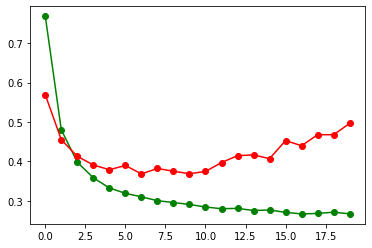

In [106]:
from matplotlib import pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_loss']))), history.history['val_loss'], 'r-o', label='Validation')
plt.savefig('losses.png')

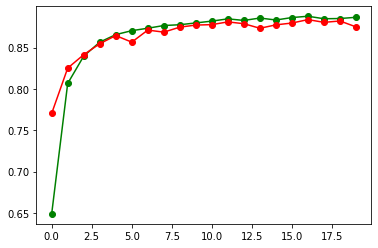

In [107]:
plt.plot(list(range(len(history.history['accuracy']))), history.history['accuracy'], 'g-o', label='Training')
plt.plot(list(range(len(history.history['val_accuracy']))), history.history['val_accuracy'], 'r-o', label='Validation')
plt.savefig('accuracies.png')

# Evaluation

In [108]:
test_pred = model.predict(test_X)

In [109]:
test_y_orig = []
test_pred_orig = []

for i,pred in enumerate(test_y):
    test_y_orig.append(np.argmax(pred))

for i,pred in enumerate(test_pred):
    test_pred_orig.append(np.argmax(pred))

In [110]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_y_orig, test_pred_orig))
print(classification_report(test_y_orig, test_pred_orig))

[[1121   49   39]
 [ 142  926  142]
 [  61   47 1102]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1209
           1       0.91      0.77      0.83      1210
           2       0.86      0.91      0.88      1210

    accuracy                           0.87      3629
   macro avg       0.87      0.87      0.87      3629
weighted avg       0.87      0.87      0.87      3629



In [104]:
model.save("LSTMModel")

In [105]:
import shutil
shutil.make_archive('LSTMModel', 'zip', 'LSTMModel')

'/content/newz-aware/LSTMModel.zip'